In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *


def display_categorical_features(df, thresh=10):
    """データを最初にここに通して質的変数の確認を行う"""
    unique_count = df.select_dtypes('object').apply(pd.Series.nunique, axis=0)
    for idx in unique_count.index:
        if unique_count[idx] <= thresh:
            print(f"{idx}\t{unique_count[idx]}\t{df[idx].unique()}")
        else:
            print(f"{idx}\t{unique_count[idx]}")

In [2]:
df = pd.read_csv("train_processed.csv").drop(["dateid"], axis=1)
display_categorical_features(df)

week	5	['Tue' 'Wed' 'Thu' 'Fri' 'Mon']
name	213
remarks	7	[nan 'お楽しみメニュー' 'こだわりメニュー' 'スペシャルメニュー' '近隣に飲食店複合ビルオープン' 'イチオシ' 'コンビニ改装'
 '弁当種類増↓']
event	2	[nan 'ママの会' 'キャリアアップ支援セミナー']
weather	62


In [54]:
exp = setup(df, target="y", session_id=0, log_experiment=True, experiment_name="mufg")

,Description,Value
0,session_id,0
1,Target,y
2,Original Data,"(337, 42)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,38
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(235, 255)"


In [55]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,10.5985,203.6627,13.9459,0.5156,0.2204,0.1818,0.0270
rf,Random Forest Regressor,10.6542,204.5946,13.9513,0.5100,0.2188,0.1785,0.1630
ridge,Ridge Regression,11.3471,215.6974,14.5602,0.4865,0.2307,0.1947,0.0050
br,Bayesian Ridge,11.5741,221.5186,14.7841,0.4795,0.2328,0.1979,0.0130
ada,AdaBoost Regressor,11.1704,217.3543,14.4744,0.4782,0.2275,0.1858,0.0200
xgboost,Extreme Gradient Boosting,11.1037,220.4396,14.4049,0.4698,0.2320,0.1918,0.0770
lightgbm,Light Gradient Boosting Machine,10.9674,225.7558,14.7176,0.4681,0.2373,0.1865,0.0140
lasso,Lasso Regression,12.2078,245.9817,15.5723,0.4295,0.2418,0.2075,0.0060
huber,Huber Regressor,12.5559,270.0904,16.2116,0.3734,0.2568,0.2123,0.0120
omp,Orthogonal Matching Pursuit,12.4191,300.5858,17.0180,0.2953,0.2592,0.2043,0.0060


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
model = create_model("rf")
# model = create_model("br")
# model = create_model("lasso")
# model = create_model("ridge")
# model = create_model("gbr")
# model = create_model("xgboost")
# model = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.0871,475.4619,21.8051,-0.1559,0.3065,0.2065
1,9.4817,128.1917,11.3222,0.7788,0.1866,0.1480
2,11.0167,190.2295,13.7924,0.6423,0.2085,0.1731
3,9.3504,126.3798,11.2419,0.7767,0.1668,0.1455
4,10.0292,157.8950,12.5656,0.5615,0.1689,0.1428
5,12.4517,252.6884,15.8962,0.1960,0.2244,0.2005
6,10.3152,265.2731,16.2872,0.4603,0.2580,0.1942
7,8.8526,116.1482,10.7772,0.6818,0.1985,0.1714
8,9.6430,158.3610,12.5842,0.6837,0.2533,0.2147


In [57]:
print(model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)


In [58]:
tuned_model = tune_model(model, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,15.0144,482.7188,21.9709,-0.1736,0.3109,0.2073
1,11.0300,173.7636,13.1819,0.7001,0.1956,0.1653
2,12.4362,222.8964,14.9297,0.5808,0.2166,0.1923
3,9.7614,126.6648,11.2545,0.7762,0.1669,0.1506
4,10.2761,165.7684,12.8751,0.5396,0.1798,0.1485
5,13.0365,288.2251,16.9772,0.0829,0.2332,0.2104
6,10.4986,251.8694,15.8704,0.4876,0.2615,0.2038
7,8.4901,115.6083,10.7521,0.6833,0.1922,0.1625
8,9.7795,174.8163,13.2218,0.6508,0.2609,0.2159


In [44]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,11.5160,226.0800,15.0360,0.6024,0.2230,0.1834


,kcal,precipitation,temperature,week_Fri,week_Mon,week_Thu,week_Tue,week_Wed,soldout_0,name_いか天ぷら,...,ingredient_noodle_not_available,ingredient_other_1.0,cook_yaki_1.0,cook_ni_1.0,cook_age_1.0,cook_itame_not_available,cook_curry_not_available,cook_other_not_available,y,Label
0,419.584106,2.5,26.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,137.0,105.064201
1,423.000000,12.0,23.700001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,80.0,65.858404
2,385.000000,0.0,30.299999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,53.0,59.835316
3,385.000000,2.0,22.100000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,68.0,59.575951
4,425.000000,23.0,9.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,68.0,73.952961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,419.584106,9.5,8.300000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,121.0,107.544114
98,430.000000,31.0,23.299999,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,62.0,70.125261
99,410.000000,0.0,19.299999,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,62.0,55.248399
100,433.000000,0.0,12.100000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,46.0,67.548263


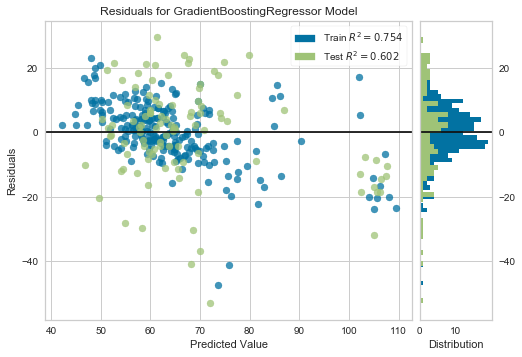

In [45]:
plot_model(tuned_model)

In [46]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [47]:
final_model = finalize_model(tuned_model)

In [48]:
df_pred = pd.read_csv("test_processed.csv")
df_dateid = df_pred["dateid"]
df_pred = df_pred.drop(["dateid"], axis=1)
df_pred = predict_model(final_model, data=df_pred)
df_submit = pd.concat([df_dateid, df_pred["Label"]], axis=1)
df_submit.columns = ["dateid", "y"]
df_submit.to_csv("submit.csv", index=False, header=False)